In [1]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictoions.

In [2]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 6.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 744 kB/s 
     |████████████████████████████████| 128 kB 18.6 MB/s 
     |████████████████████████████████| 112 kB 12.0 MB/s 
     |████████████████████████████████| 4.1 MB 21.4 MB/s 
     |████████████████████████████████| 110 kB 46.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found

In [3]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override() 

df = web.get_data_yahoo('FNILX', start='2012-01-01', end='2019-12-17')

# Display data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-28,10.04,10.04,10.04,10.04,9.512137,0
2018-10-01,10.08,10.08,10.08,10.08,9.550035,0
2018-10-02,10.08,10.08,10.08,10.08,9.550035,0
2018-10-03,10.09,10.09,10.09,10.09,9.559508,0
2018-10-04,10.00,10.00,10.00,10.00,9.474240,0
...,...,...,...,...,...,...
2019-12-10,11.02,11.02,11.02,11.02,10.494129,0
2019-12-11,11.05,11.05,11.05,11.05,10.522698,0
2019-12-12,11.14,11.14,11.14,11.14,10.608403,0


In [5]:
# Retrieve matrix dimensions

df.shape

(306, 6)

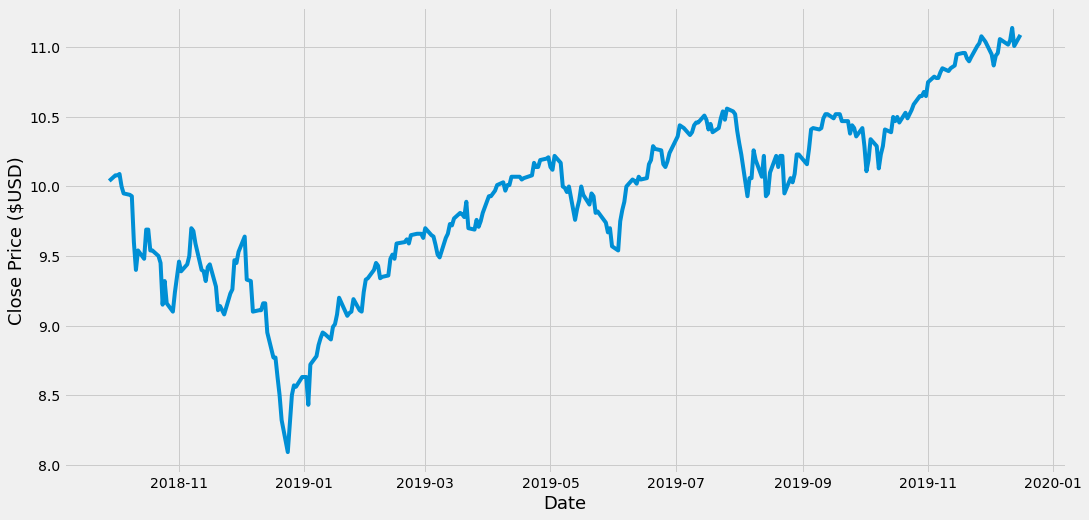

In [6]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [7]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

245


In [8]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.63934416],
       [0.6524589 ],
       [0.6524589 ],
       [0.65573766],
       [0.62622942],
       [0.60983591],
       [0.60655715],
       [0.6032787 ],
       [0.49508201],
       [0.42950799],
       [0.47540974],
       [0.45573748],
       [0.52458994],
       [0.52458994],
       [0.47540974],
       [0.47540974],
       [0.462295  ],
       [0.4459015 ],
       [0.34754079],
       [0.40327851],
       [0.35081955],
       [0.3311476 ],
       [0.37704903],
       [0.4131148 ],
       [0.44918026],
       [0.42622954],
       [0.44262274],
       [0.462295  ],
       [0.52786871],
       [0.52131149],
       [0.49180325],
       [0.42950799],
       [0.42622954],
       [0.40327851],
       [0.43606552],
       [0.44262274],
       [0.39016377],
       [0.33442605],
       [0.34426234],
       [0.32459007],
       [0.37377027],
       [0.38360656],
       [0.45245903],
       [0.4459015 ],
       [0.47213098],
       [0.50819675],
       [0.40655728],
       [0.403

In [9]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.63934416, 0.6524589 , 0.6524589 , 0.65573766, 0.62622942,
       0.60983591, 0.60655715, 0.6032787 , 0.49508201, 0.42950799,
       0.47540974, 0.45573748, 0.52458994, 0.52458994, 0.47540974,
       0.47540974, 0.462295  , 0.4459015 , 0.34754079, 0.40327851,
       0.35081955, 0.3311476 , 0.37704903, 0.4131148 , 0.44918026,
       0.42622954, 0.44262274, 0.462295  , 0.52786871, 0.52131149,
       0.49180325, 0.42950799, 0.42622954, 0.40327851, 0.43606552,
       0.44262274, 0.39016377, 0.33442605, 0.34426234, 0.32459007,
       0.37377027, 0.38360656, 0.45245903, 0.4459015 , 0.47213098,
       0.50819675, 0.40655728, 0.40327851, 0.3311476 , 0.33442605,
       0.33442605, 0.35081955, 0.35081955, 0.28196708, 0.22295091,
       0.22295091, 0.17704916, 0.13442617, 0.07540968, 0.        ])]
[0.13442617107290245]

[array([0.63934416, 0.6524589 , 0.6524589 , 0.65573766, 0.62622942,
       0.60983591, 0.60655715, 0.6032787 , 0.49508201, 0.42950799,
       0.47540974, 0.45573748, 0.52

In [10]:
# Convert x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(185, 60, 1)

In [12]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

185/185 [==============================] - 19s 61ms/step - loss: 0.0084


In [15]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [17]:
# Reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [18]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)



2/2 [==============================] - 2s 40ms/step


In [19]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

0.16641061814104924


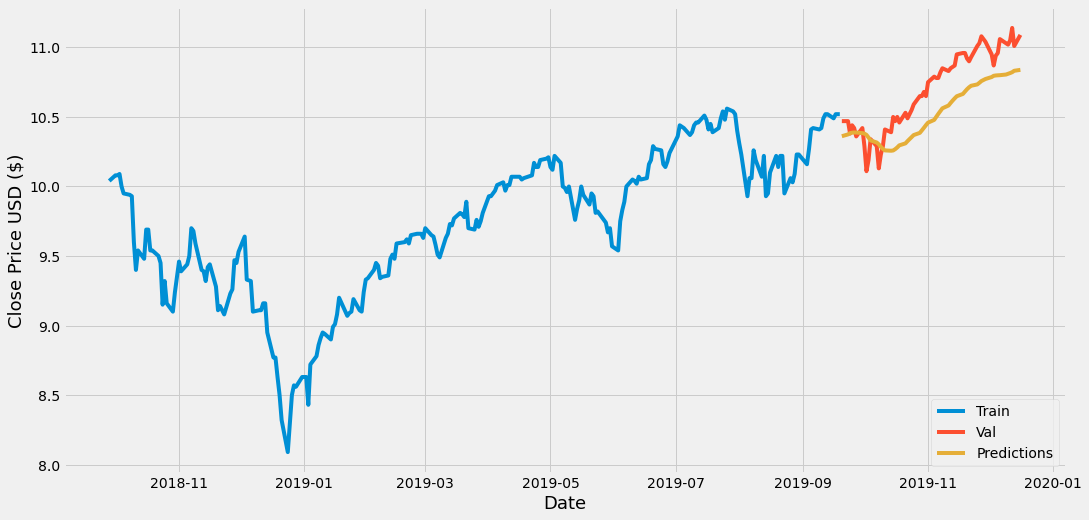

In [20]:
# Plot the data

train = data[:training_data_len].copy()  
valid = data[training_data_len:].copy()  

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2019-09-20,10.47,10.361540
2019-09-23,10.47,10.374307
2019-09-24,10.38,10.383762
2019-09-25,10.44,10.386850
2019-09-26,10.42,10.388434
...,...,...
2019-12-10,11.02,10.810314
2019-12-11,11.05,10.815585
2019-12-12,11.14,10.821851


In [22]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('FNILX', start='2012-01-01', end='2019-12-17')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 53ms/step
[[10.846291]]


In [23]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('FNILX', start='2019-12-18', end='2019-12-19')
print(actual_apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    11.09
Name: Close, dtype: float64
